In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

---

# Raw Data Sources:** 

* [FBI -- LEOKA](https://ucr.fbi.gov/leoka)
* [Police Employment](https://ucr.fbi.gov/crime-in-the-u.s)
* [Murders](https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/tables/table-1)
* [Murders by race](https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/tables/expanded-homicide-data-table-2.xls)
* [IIHS Yearly Fatalities](https://www.iihs.org/topics/fatality-statistics/detail/yearly-snapshot)
* [US Census Bureau](https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-detail.html)
* [Mapping Police Violence](https://mappingpoliceviolence.org/)

# Overlap Explanation

At the time of writing: US Government data extends through 2018 and MPV data covers 2013-2019, therefore the timeframe used is 2013-2018.

In [2]:
# injury counts not provided before 2012, used FBI stated ratios

.266*54774, .261*53469

(14569.884, 13955.409)

In [3]:
# manual raw data from FBI, IIHS, USCB

govt_data = {
'police_killed_felony': [27, 51, 41, 66, 46, 55],
'police_killed_accident': [49, 45, 45, 52, 47, 51],
'police_assaulted': [49851, 48315, 50212, 57180, 60211, 58866],
'police_injured': [14565, 13654, 14281, 16535, 17476, 18005],
'police_per_civ': [.0023, .0023, .0023, .0024, .0024, .0024],
'total_pop': [316497531, 318907401, 320896618, 323405935, 325147121, 327167434],
'black_pop': [41669064, 42112872, 42561012, 43003266, 43410367, 43804319],
'total_murdered': [14319, 14164, 15883, 17413, 17294, 16214],
'black_murdered': [6261, 6095, 7039, 7881, 7851, 7407],
'civ_motor_deaths_100k': [10.4, 10.3, 11, 11.7, 11.5, 11.2],
}

gov = pd.DataFrame(govt_data, index=np.arange(2013, 2019))
print(gov.shape)
gov

(6, 10)


,police_killed_felony,police_killed_accident,police_assaulted,police_injured,police_per_civ,total_pop,black_pop,total_murdered,black_murdered,civ_motor_deaths_100k
2013,27,49,49851,14565,0.0023,316497531,41669064,14319,6261,10.4
2014,51,45,48315,13654,0.0023,318907401,42112872,14164,6095,10.3
2015,41,45,50212,14281,0.0023,320896618,42561012,15883,7039,11.0
2016,66,52,57180,16535,0.0024,323405935,43003266,17413,7881,11.7
2017,46,47,60211,17476,0.0024,325147121,43410367,17294,7851,11.5
2018,55,51,58866,18005,0.0024,327167434,43804319,16214,7407,11.2


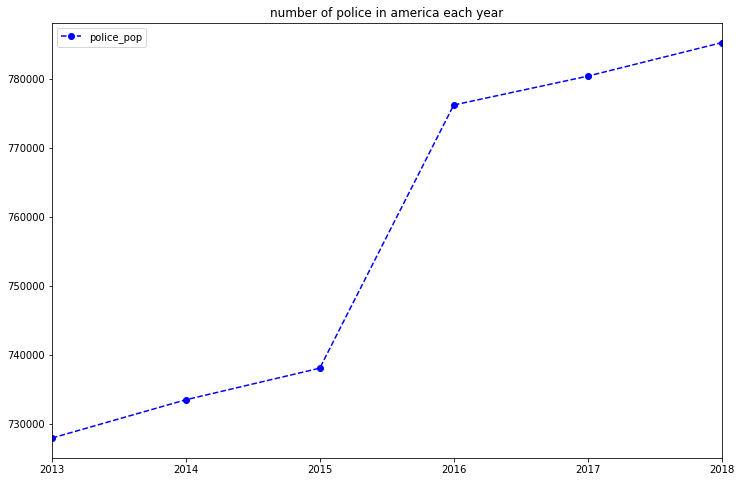

In [4]:
# per FBI: police in america by year

gov['police_pop'] = round(gov['police_per_civ']*gov['total_pop'])

gov.plot(y='police_pop', figsize=(12,8),
         color='blue', marker='o', linestyle='--',
         title='number of police in america each year');

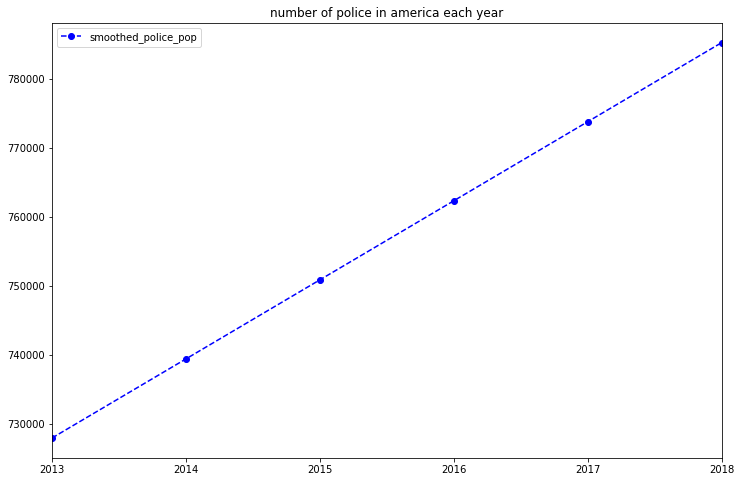

In [5]:
# smoothed FBI: police in america by year

smooth = np.linspace(gov['police_pop'].min(), gov['police_pop'].max(), 6)

gov['smoothed_police_pop'] = [round(i) for i in smooth]

gov.plot(y='smoothed_police_pop', figsize=(12,8),
         color='blue', marker='o', linestyle='--',
         title='number of police in america each year');

In [6]:
# calculations

gov['true_total_pop'] = gov['total_pop']-gov['smoothed_police_pop']
gov['ratio_black'] = gov['black_pop']/gov['total_pop']
gov['true_black_pop'] = round(gov['ratio_black']*gov['true_total_pop'])

gov['police_injury_percent'] = gov['police_injured']/gov['police_assaulted']
gov['police_injury_100k'] = gov['police_injured']/(gov['smoothed_police_pop']/1e5)
gov['police_killed_felony_100k'] = gov['police_killed_felony']/(gov['smoothed_police_pop']/1e5)
gov['police_killed_accident_100k'] = gov['police_killed_accident']/(gov['smoothed_police_pop']/1e5)

gov['total_murdered_100k'] = gov['total_murdered']/(gov['true_total_pop']/1e5)
gov['black_murdered_100k'] = gov['black_murdered']/(gov['true_black_pop']/1e5)

gov.iloc[:,10:]

,police_pop,smoothed_police_pop,true_total_pop,ratio_black,true_black_pop,police_injury_percent,police_injury_100k,police_killed_felony_100k,police_killed_accident_100k,total_murdered_100k,black_murdered_100k
2013,727944.0,727944.0,315769587.0,0.131657,41573225.0,0.292171,2000.840724,3.709077,6.731287,4.534636,15.060174
2014,733487.0,739396.0,318168005.0,0.132054,42015232.0,0.282604,1846.642395,6.897522,6.086049,4.451736,14.506644
2015,738062.0,750847.0,320145771.0,0.132632,42461426.0,0.284414,1901.985358,5.460500,5.993232,4.961178,16.577399
2016,776174.0,762299.0,322643636.0,0.132970,42901903.0,0.289175,2169.096378,8.658020,6.821470,5.396976,18.369815
2017,780353.0,773750.0,324373371.0,0.133510,43307064.0,0.290246,2258.610662,5.945073,6.074313,5.331510,18.128682
2018,785202.0,785202.0,326382232.0,0.133890,43699189.0,0.305864,2293.040517,7.004567,6.495144,4.967795,16.949971


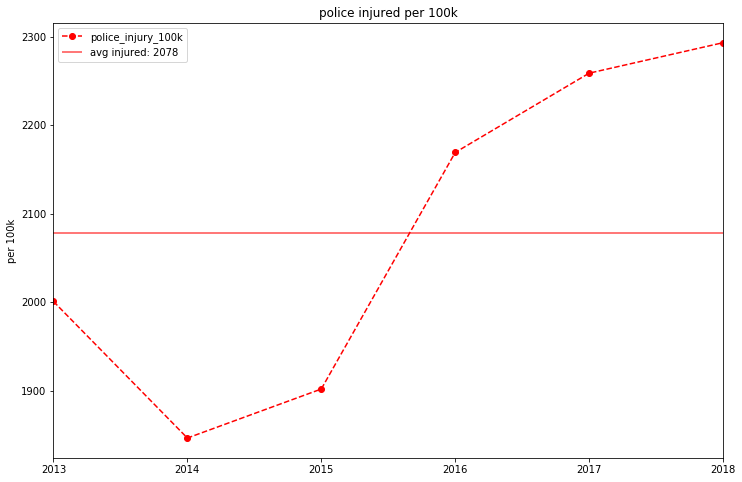

In [7]:
# police injuries

gov.plot(y='police_injury_100k', figsize=(12,8),
         color='red', marker='o', linestyle='--',
         title='police injured per 100k')
avg = int(gov['police_injury_100k'].mean())
plt.hlines(avg, 2010, 2018, label=f'avg injured: {avg}',
           color='red', alpha=0.7)
plt.ylabel('per 100k')
plt.legend();
plt.savefig('police_injured.png')

In [8]:
int(gov['police_injury_100k'].mean())

2078

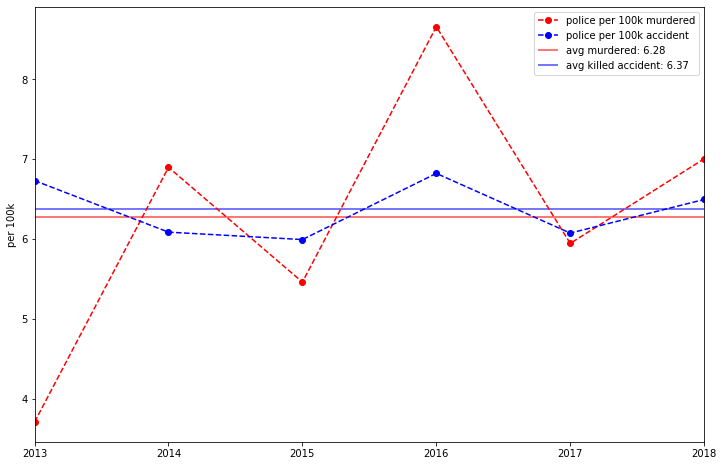

In [9]:
# police killed by offenders vs accidents

police_killed = ['police_killed_felony_100k', 'police_killed_accident_100k']
avg_killed = gov[police_killed].mean()

gov['police_killed_felony_100k'].plot(label='police per 100k murdered', color='red',
                                      marker='o', linestyle='--', figsize=(12, 8))
gov['police_killed_accident_100k'].plot(label='police per 100k accident', color='blue',
                                        marker='o', linestyle='--')
avg = round(avg_killed.iloc[0], 2)
plt.hlines(avg, 2013, 2018, label=f'avg murdered: {avg}', color='red', alpha=0.7)
avg = round(avg_killed.iloc[1], 2)
plt.hlines(avg, 2013, 2018, label=f'avg killed accident: {avg}', color='blue', alpha=0.7)
plt.ylabel('per 100k')
plt.legend();
plt.savefig('police_murdered_accident.png')

In [10]:
avg_killed

police_killed_felony_100k      6.279126
police_killed_accident_100k    6.366916
dtype: float64

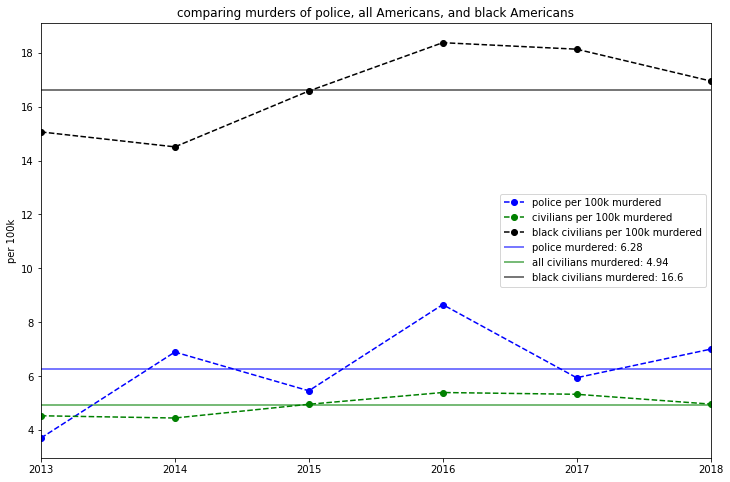

In [11]:
# police murdered vs civilians murdered


gov['police_killed_felony_100k'].plot(label='police per 100k murdered', color='blue',
                                      marker='o', linestyle='--', figsize=(12, 8))
gov['total_murdered_100k'].plot(label='civilians per 100k murdered', color='green',
                                marker='o', linestyle='--')
gov['black_murdered_100k'].plot(label='black civilians per 100k murdered', color='black',
                                marker='o', linestyle='--')

avg1 = round(avg_killed.iloc[0], 2)
plt.hlines(avg1, 2013, 2018, label=f'police murdered: {avg1}', color='blue', alpha=0.7)
avg2 = round(gov['total_murdered_100k'].mean(), 2)
plt.hlines(avg2, 2013, 2018, label=f'all civilians murdered: {avg2}', color='green', alpha=0.7)
avg3 = round(gov['black_murdered_100k'].mean(), 2)
plt.hlines(avg3, 2013, 2018, label=f'black civilians murdered: {avg3}', color='black', alpha=0.7)

plt.title('comparing murders of police, all Americans, and black Americans')
plt.ylabel('per 100k')
plt.legend();
plt.savefig('all_murders.png')

In [12]:
avg3/avg1

2.643312101910828

In [13]:
"Being black has always been dangerous."[:22]

'Being black has always'

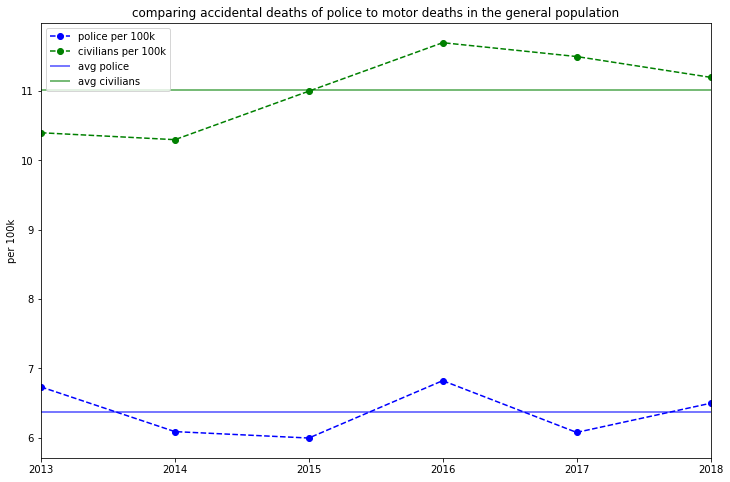

In [14]:
# police killed in accidents vs civilians

gov['police_killed_accident_100k'].plot(label='police per 100k', color='blue',
                                        marker='o', linestyle='--', figsize=(12, 8))
gov['civ_motor_deaths_100k'].plot(label='civilians per 100k', color='green',
                                  marker='o', linestyle='--')

plt.hlines(gov['police_killed_accident_100k'].mean(),
           2010, 2018, label='avg police', color='blue', alpha=0.7)
plt.hlines(gov['civ_motor_deaths_100k'].mean(),
           2010, 2018, label='avg civilians', color='green', alpha=0.7)

plt.title('comparing accidental deaths of police to motor deaths in the general population')
plt.ylabel('per 100k')
plt.legend();
plt.savefig('all_accident.png')

---

# MPV Data

In [15]:
# data sheets

raw_xls = pd.ExcelFile('MPVDatasetDownload.xlsx')
sheets = raw_xls.sheet_names
sheets

['2013-2019 Police Killings',
 '2013-2019 Killings by PD',
 '2013-2019 Killings by State',
 'Police Killings of Black Men']

In [16]:
# reading police killings

civ_killed = pd.read_excel(raw_xls, sheets[0])
print(civ_killed.shape)
civ_killed.head()

(7663, 27)


,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,2019-12-31,Broad St.,Globe,AZ,85501.0,Gila,Globe Police Department,Gunshot,"After midnight, a patrol officer was on routin...",Pending investigation,No known charges,https://www.azfamily.com/news/phoenix-man-arme...,No,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664
1,Name withheld by police,NaN,Male,Unknown race,NaN,2019-12-31,7239-7411 I-40,Memphis,AR,38103.0,Crittenden,"Memphis Police Department, Arkansas State Police",Gunshot,"Police began a chase regarding a kidnapping, e...",Pending investigation,No known charges,https://www.fox16.com/local-news-2/kidnapping-...,No,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665
2,Terry Hudson,57,Male,Black,NaN,2019-12-31,3600 N 24th St,Omaha,NE,68110.0,Douglas,Omaha Police Department,Gunshot,Police responded to a domestic incident on the...,Pending investigation,No known charges,https://www.ketv.com/article/omaha-police-offi...,No,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661
3,Malik Williams,23,Male,Black,NaN,2019-12-31,30800 14th Avenue South,Federal Way,WA,98003.0,King,Federal Way Police Department,Gunshot,Police responded to a domestic dispute. Police...,Pending investigation,No known charges,https://www.king5.com/article/news/local/2-fed...,No,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662
4,Frederick Perkins,37,Male,Black,NaN,2019-12-31,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,St. Louis,Chesterfield Police Department,Gunshot,Police went to Chesterfield Outlets about 1 p....,Pending investigation,No known charges,https://www.stltoday.com/news/local/crime-and-...,No,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667


In [17]:
# total race grouping

civ_killed.groupby('Victim\'s race')['City'].count()

Victim's race
Asian                118
Black               1944
Hispanic            1333
Native American      112
Pacific Islander      42
Unknown Race          64
Unknown race         669
White               3375
Name: City, dtype: int64

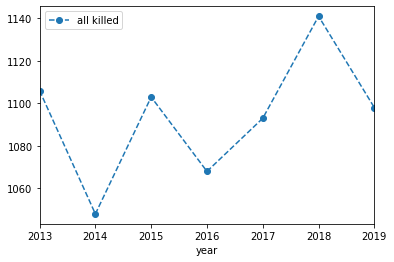

In [18]:
# all killed per year

civ_killed['year'] = [i.year for i in civ_killed['Date of Incident (month/day/year)']]

civ_killed_yearly = pd.DataFrame(civ_killed.groupby('year')['City'].count())
total_cop_deaths = np.concatenate(civ_killed_yearly.values, axis=0)
civ_killed_yearly.columns = ['all killed']

civ_killed_yearly.plot(marker='o', linestyle='--');

In [19]:
# relevant time-frame

civ_killed_yearly.loc[:2018].sum()

all killed    6559
dtype: int64

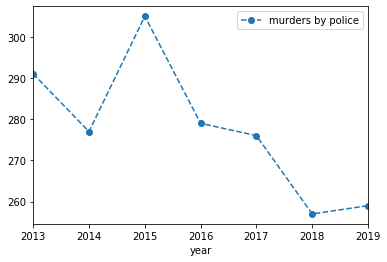

In [20]:
# black americans killed per year

black_killed_yearly = pd.DataFrame(civ_killed[civ_killed['Victim\'s race'] == 'Black'].groupby('year')['City'].count())
black_cop_deaths = np.concatenate(black_killed_yearly.values, axis=0)
black_killed_yearly.columns = ['murders by police']

black_killed_yearly.plot(marker='o', linestyle='--');

# Some ratios

In [21]:
6559/0.92

7129.347826086956

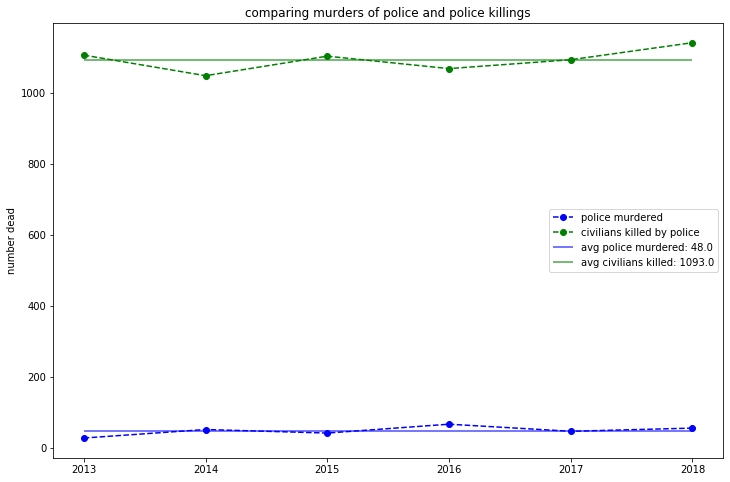

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(gov['police_killed_felony'], label='police murdered',
         color='blue', marker='o', linestyle='--')
plt.plot(civ_killed_yearly.loc[:2018], label='civilians killed by police',
         color='green', marker='o', linestyle='--')

avg1 = round(gov['police_killed_felony'].mean())
plt.hlines(avg1, 2013, 2018, label=f'avg police murdered: {avg1}', color='blue', alpha=0.7)
avg2 = round(civ_killed_yearly.loc[:2018].mean().values[0])
plt.hlines(avg2, 2013, 2018, label=f'avg civilians killed: {avg2}', color='green', alpha=0.7)

plt.title('comparing murders of police and police killings')
plt.ylabel('number dead')
plt.legend();
plt.savefig('police_v_civilians.png')

In [23]:
civ_killed_yearly.loc[:2018].sum()

all killed    6559
dtype: int64

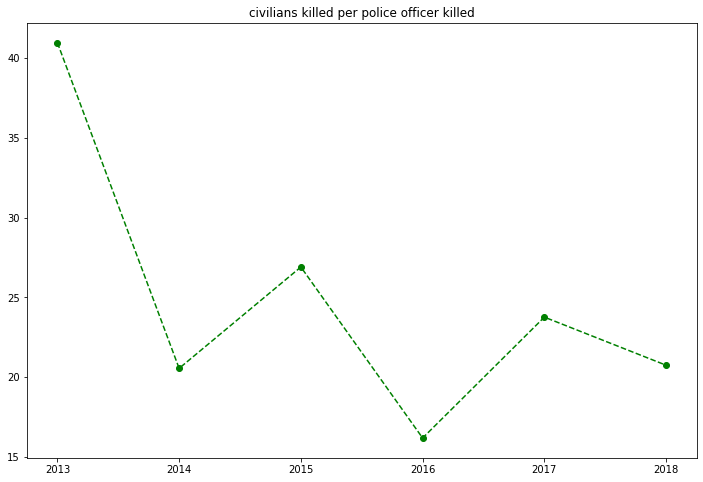

In [24]:
# civilians killed per police killed

plt.figure(figsize=(12, 8))

y = [i/gov['police_killed_felony'].iloc[idx] for idx, i in enumerate(total_cop_deaths[:-1])]

plt.plot(np.arange(2013, 2019), y, color='g', marker='o', linestyle='--')
plt.title('civilians killed per police officer killed');
plt.savefig('police_v_civilians_2.png')

In [25]:
np.mean(y), y[-1]

(24.85042731461441, 20.745454545454546)

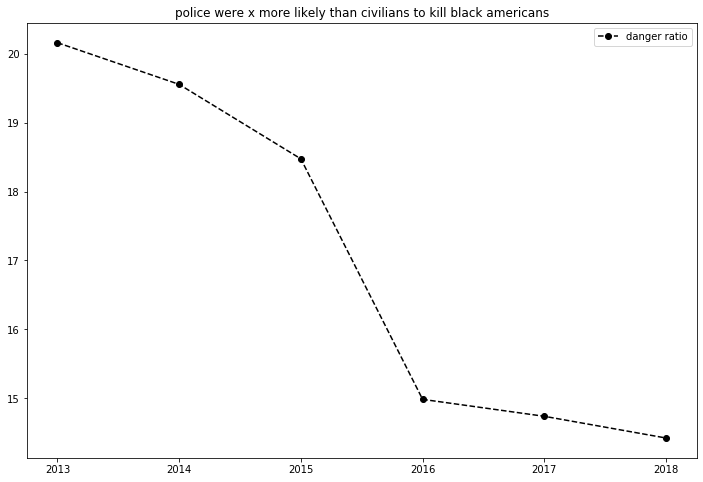

In [26]:
# weighted - likelihood of police vs civilians to kill black americans

plt.figure(figsize=(12, 8))

y = [(i/gov['smoothed_police_pop'].iloc[idx])/(gov['black_murdered'].iloc[idx]/gov['true_total_pop'].iloc[idx])
      for idx, i in enumerate(black_cop_deaths[:-1])]

plt.plot(np.arange(2013, 2019), y, label='danger ratio', color='k', marker='o', linestyle='--')
plt.title('police were x more likely than civilians to kill black americans')
plt.legend();
plt.savefig('police_danger.png')

In [27]:
np.mean(y)

17.056080393606916